# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [43]:
import pandas as pd
import requests
import tweepy
import json
import numpy as np

In [14]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
prediction = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [5]:
# Download the tweets using the tweet_id from the prediction table
tweet_id = prediction['tweet_id']
tweets = []
no_tweet_for_ids = []

for tweet in tweet_id:
    try:
        tweets.append(api.get_status(tweet, tweet_mode='extended'))
    except BaseException as e: 
        no_tweet_for_ids.append(tweet)

In [6]:
# Display the number of tweets downloaded
print('Number of tweets successfully downloaded: ', len(tweets))

Number of tweets successfully downloaded:  1785


In [7]:
#Read the tweet_json file and convert to a pandas dataframe
tweet_list = []
for tweet in tweets:
    tweet_list.append(tweet._json)

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(tweet_list, indent=4))

In [8]:
tweet_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['full_text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        tweet_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                             'created_at': created_at,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(tweet_demo_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at',
                                                       'source', 'retweeted_status', 'url'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
tweet_json

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,666020888022790149,2292,422,Sun Nov 15 22:32:08 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/BLDqew2Ijj
1,666029285002620928,112,39,Sun Nov 15 23:05:30 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI
2,666033412701032449,100,36,Sun Nov 15 23:21:54 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
3,666044226329800704,247,115,Mon Nov 16 00:04:52 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
4,666049248165822465,89,37,Mon Nov 16 00:24:50 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
...,...,...,...,...,...,...,...
1780,861288531465048066,15353,3591,Sun May 07 18:36:02 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/SqKJPwbQ2g
1781,861383897657036800,32304,9269,Mon May 08 00:54:59 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/QFRlbZw4Z1
1782,862096992088072192,66308,20008,Wed May 10 00:08:34 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/nvZyyrp0kd
1783,862457590147678208,18281,4253,Thu May 11 00:01:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/jvSNASweNb


In [10]:
# Check how many tweets are retweets
tweet_json.retweeted_status.value_counts()

Original tweet       1718
This is a retweet      67
Name: retweeted_status, dtype: int64

In [11]:
# Check for any duplicated tweets in archive table
len(tweet_json[tweet_json.tweet_id.duplicated()])

0

In [12]:
tweet_json.isnull().any().any()

False

In [15]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [16]:
#check for null values
archive.isnull().any().any()

True

In [17]:
# Check for any duplicated tweets in archive table
len(archive[archive.tweet_id.duplicated()])

0

In [18]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [21]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
# Check for any duplicated tweets in prection table
len(prediction[prediction.tweet_id.duplicated()])

0

## Quality issues

#### tweet_json
1. the date format in `created_at` contains different features that should be separated.

2. Tweet_json has retweets. Remove them

#### Prediction
3. Dog and conf have three different columns. Consolidate them into one

4. `jpg_url` column has 66 duplicate entries. Remove duplicates

#### Archive
5. Archive has numerous null values

6. The source column has a complex url. Remove the `a href//https` part


#### General
7. Prediction and archive columns have complex names.

8. `tweet_id` should not be an integer. Convert to string

### Tidiness issues
1. The tables should be merged into `tweet` and `images`

2. Dog breeds/types have different colums. Consolidate them

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# Make copies of original pieces of data
tweet_clean = tweet_json.copy()
archive_clean = archive.copy()
prediction_clean = prediction.copy()

### Issue #1: Numerous null values and Incorrect dog names in `archive`

#### Define: Remove small letters using regex

#### Code

In [25]:
# Use a regular expression to find name entries that are uppercase
archive_clean['name'] = archive_clean.name.str.extract('\\b([A-Z]\\S*)\\b')

In [27]:
# Drop any remaining rows that contain None in the name column
archive_clean = archive_clean[archive_clean.name != 'None']

In [28]:
# Drop any remaining rows that contain NaN in the name column
archive_clean.dropna(subset=['name'], inplace=True)

#### Test

In [30]:
archive_clean[archive_clean.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
60,880465832366813184,NaN,NaN,2017-06-29 16:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She had her first beach experie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880465832...,12,10,Bella,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,666817836334096384,NaN,NaN,2015-11-18 03:18:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeph. He is a German Boston Shuttlecoc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666817836...,9,10,Jeph,None,None,None,None
2317,666644823164719104,NaN,NaN,2015-11-17 15:51:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He is a Botwanian Gouda. Can ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666644823...,9,10,Jimothy,None,None,None,None
2318,666454714377183233,NaN,NaN,2015-11-17 03:16:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'll name the dogs from now on. This is Kreggo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666454714...,10,10,Kreggory,None,None,None,None
2319,666447344410484738,NaN,NaN,2015-11-17 02:46:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666447344...,9,10,Scout,None,None,None,None


In [31]:
archive_clean['name'].value_counts()

Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
              ..
Devón          1
Gert           1
Dex            1
Ace            1
Christoper     1
Name: name, Length: 931, dtype: int64

### Issue #2: The web address is comple in the `archive` data

#### Define: Remove HTML from rows in source column

#### Code

In [32]:
# Remove HTML from rows in source column
archive_clean['source'] = archive_clean['source'].str.replace(
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
archive_clean['source'] = archive_clean['source'].str.replace(
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
archive_clean['source'] = archive_clean['source'].str.replace(
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
archive_clean['source'] = archive_clean['source'].str.replace(
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

C:\Users\OADEPO~1\AppData\Local\Temp/ipykernel_28488/3348938654.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  archive_clean['source'] = archive_clean['source'].str.replace(
C:\Users\OADEPO~1\AppData\Local\Temp/ipykernel_28488/3348938654.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  archive_clean['source'] = archive_clean['source'].str.replace(
C:\Users\OADEPO~1\AppData\Local\Temp/ipykernel_28488/3348938654.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  archive_clean['source'] = archive_clean['source'].str.replace(
C:\Users\OADEPO~1\AppData\Local\Temp/ipykernel_28488/3348938654.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  archive_clean['source'] = archive_clean['source'].str.replace(


#### Test

In [33]:
#Verify that HTML from rows in source column have been removed
archive_clean.source.value_counts()

Twitter for iPhone    1436
Vine                    41
Twitter Web Client      16
TweetDeck                9
Name: source, dtype: int64

### Issue 3: Retweet present in `archive` data

#### Define
Remove retweets by deleting rows with non-null values in retweeted_status_id column

#### Code

In [53]:
# Remove rows that have values in the retweeted_status_id column
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

In [54]:
# Drop empty retweeted_status columns and associated in_reply columns
archive_clean = archive_clean.drop(['retweeted_status_id', 
                                    'retweeted_status_user_id',  
                                    'retweeted_status_timestamp',
                                    'in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis=1)

#### Test

In [55]:
# Verify no values in the retweeted columns
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1391 non-null   int64 
 1   timestamp           1391 non-null   object
 2   source              1391 non-null   object
 3   text                1391 non-null   object
 4   expanded_urls       1391 non-null   object
 5   rating_numerator    1391 non-null   int64 
 6   rating_denominator  1391 non-null   int64 
 7   name                1391 non-null   object
 8   stage               184 non-null    object
dtypes: int64(3), object(6)
memory usage: 108.7+ KB


### Issue 4: Duplicate jpg_url values in `prediction`

#### Define: Drops rows with duplicates in the jpg_url column

#### Code

In [62]:
# Drop all rows with duplicate addresses for jpg_url
prediction_clean = prediction_clean.drop_duplicates(subset='jpg_url')

# Drop img_num column
prediction_clean = prediction_clean.drop(['img_num'], axis=1)

#### Test

In [63]:
# Verify that there are no longer duplicate entries for jpg_url
len(prediction_clean[prediction_clean.jpg_url.duplicated()])

0

In [64]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1206 non-null   int64  
 1   jpg_url   1206 non-null   object 
 2   p1        1206 non-null   object 
 3   p1_conf   1206 non-null   float64
 4   p1_dog    1206 non-null   bool   
 5   p2        1206 non-null   object 
 6   p2_conf   1206 non-null   float64
 7   p2_dog    1206 non-null   bool   
 8   p3        1206 non-null   object 
 9   p3_conf   1206 non-null   float64
 10  p3_dog    1206 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 88.3+ KB


### Issue #5: Entries have False p1_dog, p2_dog, & p3_dog values in `prediction`

#### Define: Drop rows with entries that have False p1_dog, p2_dog, & p3_dog values

#### Code

In [34]:
# Only keep rows with entries that have p1_dog, p2_dog, & p3_dog values set to True
prediction_clean = prediction_clean[((prediction_clean['p1_dog'] == True) & 
                  (prediction_clean['p2_dog'] == True) & 
                  (prediction_clean['p3_dog'] == True))]

#### Test

In [35]:
# Verify that entries with p1_dog, p2_dog, & p3_dog set to False have been removed
prediction_clean[((prediction_clean['p1_dog'] == False) & 
                  (prediction_clean['p2_dog'] == False) & 
                  (prediction_clean['p3_dog'] == False))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue 6: Tweet_json has retweets. Remove them

#### Define: Remove rows with retweets

#### Code

In [39]:
# Keep only original tweets
tweet_clean = tweet_clean[tweet_clean.retweeted_status == 'Original tweet']

In [41]:
# Verify that only original tweets remain
tweet_clean.retweeted_status.value_counts()

Original tweet    1718
Name: retweeted_status, dtype: int64

### Issue 7: Tidiness

#### Define
Combine the 4 dog stage columns into a single column in the archive table

In [44]:
# Extract the dog stage names from the the 4 individual columns and combine into one 'stage' column
# https://stackoverflow.com/questions/44061607/pandas-lambda-function-with-nan-support

stages = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in stages:
    archive_clean[stage] = archive_clean[stage].apply(lambda x: np.NaN if x == 'None' else x)
    
archive_clean['stage'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].astype(str).sum(1)
archive_clean['stage'] = archive_clean['stage'].apply(lambda x: x.replace('nan', ''))
archive_clean['stage'] = archive_clean['stage'].apply(lambda x: np.NaN if x == '' else x)

archive_clean['stage'].replace({'doggopupper':'doggo pupper', 
                                'doggofloofer':'doggo floofer',
                                'doggopuppo':'doggo puppo',
                                '':None}, inplace=True)

In [45]:
# Drop individual dog stage columns
cols_to_drop = ['doggo', 'floofer', 'pupper', 'puppo']
archive_clean.drop(cols_to_drop, axis=1, inplace=True)

#### Test

In [46]:
# Verify that the 4 dog stage columns have merged into a single dog_stage column
# archive_clean.info()
# View the value counts for the new stage column
archive_clean['stage'].value_counts()

pupper          130
doggo            45
puppo            20
floofer           5
doggo pupper      4
Name: stage, dtype: int64

### Issue 8: Convert tweet_id to string

#### Define
Convert data type of tweet_id in all tables to object string data type for merging

#### Code

In [66]:
# Convert data type of tweet_id in all tables to object string data type for merging
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
prediction_clean.tweet_id = prediction_clean.tweet_id.astype(str)
tweet_clean.tweet_id = tweet_clean.tweet_id.astype(str)

#### Test

In [67]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1391 non-null   object
 1   timestamp           1391 non-null   object
 2   source              1391 non-null   object
 3   text                1391 non-null   object
 4   expanded_urls       1391 non-null   object
 5   rating_numerator    1391 non-null   int64 
 6   rating_denominator  1391 non-null   int64 
 7   name                1391 non-null   object
 8   stage               184 non-null    object
dtypes: int64(2), object(7)
memory usage: 108.7+ KB


In [68]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1718 entries, 0 to 1784
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1718 non-null   object
 1   favorite_count    1718 non-null   int64 
 2   retweet_count     1718 non-null   int64 
 3   created_at        1718 non-null   object
 4   source            1718 non-null   object
 5   retweeted_status  1718 non-null   object
 6   url               1718 non-null   object
dtypes: int64(2), object(5)
memory usage: 107.4+ KB


In [69]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1206 non-null   object 
 1   jpg_url   1206 non-null   object 
 2   p1        1206 non-null   object 
 3   p1_conf   1206 non-null   float64
 4   p1_dog    1206 non-null   bool   
 5   p2        1206 non-null   object 
 6   p2_conf   1206 non-null   float64
 7   p2_dog    1206 non-null   bool   
 8   p3        1206 non-null   object 
 9   p3_conf   1206 non-null   float64
 10  p3_dog    1206 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 88.3+ KB


### Issue 9: `Archive`, `Prediction` and `tweet_json` tables should be combined

#### Define
Combine the archive, prediction and tweet_json table into a single dataframe

#### Code

In [70]:
# Merge the archive and prediction tables into a single data frame
combined_archive = pd.merge(archive_clean, prediction_clean, on = 'tweet_id')
# Merge the tweet_json table into the combined_archive data frame
combined_archive = pd.merge(combined_archive, tweet_clean, on = 'tweet_id')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [71]:
# Store the combined_archive DataFrame in a CSV file
combined_archive.to_csv('twitter_archive_master.csv', 
                         index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [73]:
import matplotlib.pyplot as plt

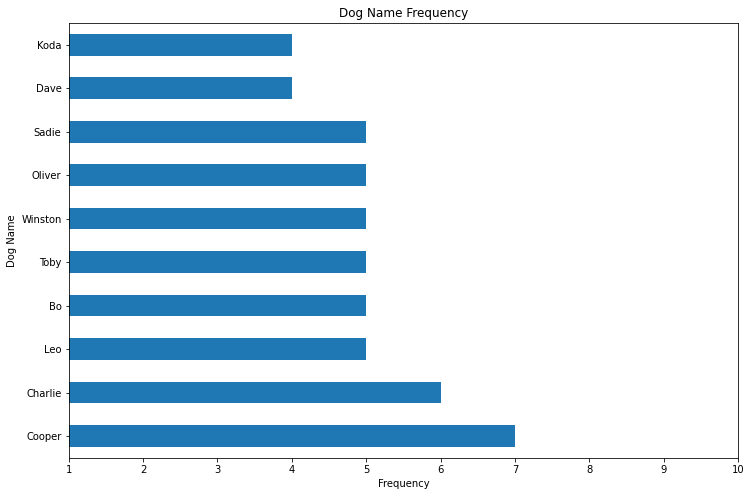

In [74]:
# Plot the top 10 Dog names by frequency
plt.figure(figsize=(12, 8))
dog_names = combined_archive.name.value_counts().nlargest(10).plot(kind = 'barh');
dog_names.set_title('Dog Name Frequency');
dog_names.set_xlabel('Frequency');
dog_names.set_ylabel('Dog Name');
dog_names.set_xlim(1, 10);

In [75]:
# Find the dog breed with the highest numerator
combined_archive.groupby('p1')['rating_numerator'].mean().nlargest(10)

p1
clumber                27.000000
Siberian_husky         14.071429
Bedlington_terrier     13.500000
Irish_setter           13.000000
Border_terrier         12.333333
bloodhound             12.333333
Cardigan               12.000000
Irish_water_spaniel    12.000000
Rhodesian_ridgeback    12.000000
Tibetan_mastiff        12.000000
Name: rating_numerator, dtype: float64

In [76]:
# Top 10 most frequent p1 dog breed predictions 
combined_archive.p1.value_counts().nlargest(10)

golden_retriever      61
Labrador_retriever    42
Pembroke              42
Chihuahua             30
pug                   24
Pomeranian            19
malamute              18
toy_poodle            17
miniature_pinscher    15
Siberian_husky        14
Name: p1, dtype: int64

### Insights:
1. Cooper is the most common dog name

2. Clumber has the highest mean numerator rating of 27.

3. Golden retriever is the most common breed